In [16]:
## EDA libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import shap

## feature engineering libraries
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split

## model preparation libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

## model evaluation libraries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

## model hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import joblib
%matplotlib inline



In [17]:
bluberry_df = pd.read_csv("WildBlueberryPollinationSimulationData.csv")

In [18]:
bluberry_df.isna().sum()


Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [19]:
def select_features_corr_basis(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_corr = SelectKBest(score_func=f_regression, k='all')
    else:
        fs_corr = SelectKBest(score_func=f_regression, k=x)
    fs_corr.fit(X_train, y_train)
    X_train_fs = fs_corr.transform(X_train)
    X_test_fs = fs_corr.transform(X_test)
    
    return X_train_fs, X_test_fs, fs_corr

def select_features_infogain_based(X_train, y_train, X_test, x='all'):
    if type(x) == str:
        fs_info = SelectKBest(score_func=mutual_info_regression, k='all')
    else:
        fs_info = SelectKBest(score_func=mutual_info_regression, k=x)
    fs_info.fit(X_train, y_train)
    X_train_fs = fs_info.transform(X_train)
    X_test_fs = fs_info.transform(X_test)
    
    return X_train_fs, X_test_fs, fs_info

In [20]:
to_drop = bluberry_df.drop(['yield', 'Row#', 'fruitmass', 'fruitset', 'seeds'], axis=1)
y = bluberry_df['yield']

X_traindrop, X_testdrop, y_traindrop, y_testdrop = train_test_split(to_drop, y, test_size=0.33, random_state=1)

X_train_fs_corrdrop, X_test_fs_corrdrop, fs_corrdrop = select_features_corr_basis(X_traindrop, y_traindrop, X_testdrop)
X_train_fs_infodrop, X_test_fs_infodrop, fs_infodrop = select_features_infogain_based(X_traindrop, y_traindrop, X_testdrop)


In [22]:
to_drop

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays
0,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,16.00,0.26
1,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,1.00,0.10
2,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,16.00,0.26
3,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,1.00,0.10
4,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06
773,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06
774,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39
775,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,3.77,0.06


In [23]:
no_drop = bluberry_df.drop(['yield', 'Row#'], axis=1)
y = bluberry_df['yield']

X_traindrop_no, X_testdrop_no, y_traindrop_no, y_testdrop_no = train_test_split(no_drop, y, test_size=0.33, random_state=1)

X_train_fs_corrdrop_no, X_test_fs_corrdrop_no, fs_corrdrop_no = select_features_corr_basis(X_traindrop_no, y_traindrop_no, X_testdrop_no)
X_train_fs_infodrop_no, X_test_fs_infodrop_no, fs_infodrop_no = select_features_infogain_based(X_traindrop_no, y_traindrop_no, X_testdrop_no)



In [24]:
X_testdrop

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays
374,12.5,0.25,0.38,0.38,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10
491,25.0,0.50,0.25,0.38,0.75,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26
678,25.0,0.50,0.38,0.38,0.63,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56
720,25.0,0.50,0.38,0.50,0.63,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56
412,12.5,0.25,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26
504,25.0,0.50,0.25,0.38,0.75,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56
49,25.0,0.25,0.25,0.25,0.38,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10
31,25.0,0.25,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39


In [25]:
X_traindrop

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays
286,12.5,0.25,0.250,0.63,0.63,69.7,42.1,58.2,50.2,24.3,41.2,1.00,0.10
614,25.0,0.50,0.250,0.75,0.50,77.4,46.8,64.7,55.8,27.0,45.8,34.00,0.56
528,25.0,0.50,0.250,0.50,0.63,94.6,57.2,79.0,68.2,33.0,55.9,34.00,0.56
708,25.0,0.50,0.380,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,1.00,0.10
116,12.5,0.25,0.250,0.25,0.75,86.0,52.0,71.9,62.0,30.0,50.8,1.00,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,25.0,0.50,0.380,0.50,0.63,94.6,57.2,79.0,68.2,33.0,55.9,16.00,0.26
767,20.0,0.00,0.585,0.00,0.00,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06
72,12.5,0.25,0.250,0.25,0.38,86.0,52.0,71.9,62.0,30.0,50.8,34.00,0.56
235,12.5,0.25,0.250,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,16.00,0.26


In [26]:
bluberry_df.shape

(777, 18)

# EDA

# info-gain vs correlation; Feature Selection

Feature 0: 184.510812 
Feature 1: 56.025407 
Feature 2: 56.110457 
Feature 3: 8.547399 
Feature 4: 115.949147 
Feature 5: 10.584235 
Feature 6: 8.223105 
Feature 7: 9.465591 
Feature 8: 10.721786 
Feature 9: 9.746869 
Feature 10: 9.334603 
Feature 11: 207.887147 
Feature 12: 211.684877 


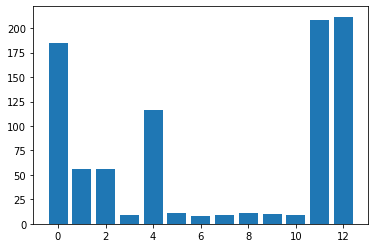

Feature 0: 0.141462 
Feature 1: 0.100733 
Feature 2: 0.070370 
Feature 3: 0.052606 
Feature 4: 0.112972 
Feature 5: 0.086581 
Feature 6: 0.092542 
Feature 7: 0.083121 
Feature 8: 0.088332 
Feature 9: 0.083021 
Feature 10: 0.082056 
Feature 11: 0.189588 
Feature 12: 0.191422 


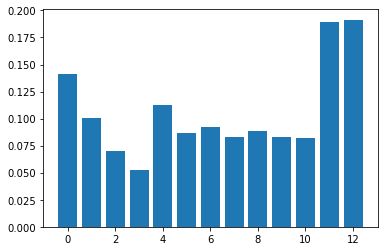

In [27]:
def fs_score_plot(fs_func):
    for i in range(len(fs_func.scores_)):
        print("Feature %d: %f " % (i, fs_func.scores_[i]))
    
    plt.bar([i for i in range(len(fs_func.scores_))], fs_func.scores_)
    plt.show()

fs_score_plot(fs_corrdrop)
fs_score_plot(fs_infodrop)

In [28]:
sc = StandardScaler()


In [29]:
bluberry_df.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [30]:
scaled_bluberry_df.head()

NameError: name 'scaled_bluberry_df' is not defined

## Feature Scaling

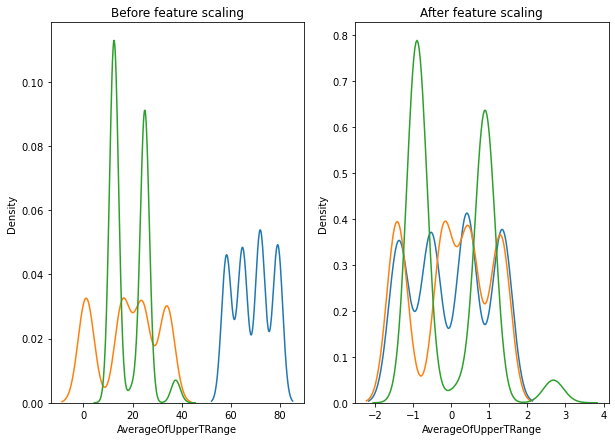

In [31]:
sc = StandardScaler()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 7))
ax1.set_title('Before feature scaling')
sns.kdeplot(bluberry_df['AverageOfUpperTRange'], ax=ax1)
sns.kdeplot(bluberry_df['RainingDays'], ax=ax1)
sns.kdeplot(bluberry_df['clonesize'], ax=ax1)


scaled_bluberry_df = pd.DataFrame(sc.fit_transform(bluberry_df), columns=bluberry_df.columns)
ax2.set_title('After feature scaling')
sns.kdeplot(scaled_bluberry_df['AverageOfUpperTRange'], ax=ax2)
sns.kdeplot(scaled_bluberry_df['RainingDays'], ax=ax2)
sns.kdeplot(scaled_bluberry_df['clonesize'], ax=ax2)

plt.show()


## Modeling

In [32]:
#X_traindrop, X_testdrop, y_traindrop, y_testdrop

In [33]:
X_traindrop = sc.fit_transform(X_traindrop)
X_traindrop_no = sc.fit_transform(X_traindrop_no)

X_testdrop = sc.fit_transform(X_testdrop)
X_testdrop_no = sc.fit_transform(X_testdrop_no)

X_train_fs_infodrop, X_test_fs_infodrop, fs_corrdrop = select_features_infogain_based(X_traindrop, y_traindrop, X_testdrop, x=10)
X_train_fs_infodrop_no, X_test_fs_infodrop_no, fs_corrdrop_no = select_features_infogain_based(X_traindrop_no, y_traindrop_no, X_testdrop_no, x=10)


In [34]:
X_train_fs_infodrop.shape

(520, 10)

## Linear Regression

In [35]:
l_reg = LinearRegression()

l_reg.fit(X_train_fs_infodrop, y_traindrop)

y_drop_predicted_l = l_reg.predict(X_test_fs_infodrop)

In [36]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testdrop, y_drop_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_testdrop, y_drop_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_testdrop, y_drop_predicted)))

NameError: name 'y_drop_predicted' is not defined

In [37]:
l_reg.fit(X_train_fs_infodrop_no, y_traindrop_no)

y_no_drop_predicted_l = l_reg.predict(X_test_fs_infodrop_no)

In [38]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testdrop_no, y_no_drop_predicted_l))
print('Mean Squared Error:', metrics.mean_squared_error(y_testdrop_no, y_no_drop_predicted_l))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_testdrop_no, y_no_drop_predicted_l)))

Mean Absolute Error: 150.14938431126316
Mean Squared Error: 35123.884130446204
Root Mean Squared Error: 187.41367114073137


## Random Forest Regression

In [39]:
rf = RandomForestRegressor()

rf.fit(X_train_fs_infodrop, y_traindrop)

y_drop_predicted_rf = rf.predict(X_test_fs_infodrop)

In [40]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testdrop, y_drop_predicted_rf))
print('Mean Squared Error:', metrics.mean_squared_error(y_testdrop, y_drop_predicted_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_testdrop, y_drop_predicted_rf)))

Mean Absolute Error: 388.56351974277766
Mean Squared Error: 254770.04636140986
Root Mean Squared Error: 504.747507533628


In [41]:
rf.fit(X_train_fs_infodrop_no, y_traindrop_no)

y_no_drop_predicted_rf = rf.predict(X_test_fs_infodrop_no)

In [42]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testdrop, y_no_drop_predicted_rf))
print('Mean Squared Error:', metrics.mean_squared_error(y_testdrop, y_no_drop_predicted_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_testdrop, y_no_drop_predicted_rf)))

Mean Absolute Error: 146.53703949972754
Mean Squared Error: 42773.117874992495
Root Mean Squared Error: 206.81662862302076


## Decision Tree Regression

In [43]:
dtr = DecisionTreeRegressor()

dtr.fit(X_train_fs_infodrop, y_traindrop)

y_drop_predicted_dtr = dtr.predict(X_test_fs_infodrop)

In [44]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testdrop, y_drop_predicted_dtr))
print('Mean Squared Error:', metrics.mean_squared_error(y_testdrop, y_drop_predicted_dtr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_testdrop, y_drop_predicted_dtr)))

Mean Absolute Error: 401.70726729471926
Mean Squared Error: 270538.8804309422
Root Mean Squared Error: 520.133521733547


In [45]:
dtr.fit(X_train_fs_infodrop_no, y_traindrop_no)

y_drop_predicted_dtr_no = dtr.predict(X_test_fs_infodrop_no)

In [46]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testdrop, y_drop_predicted_dtr_no))
print('Mean Squared Error:', metrics.mean_squared_error(y_testdrop, y_drop_predicted_dtr_no))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_testdrop, y_drop_predicted_dtr_no)))

Mean Absolute Error: 171.1460939688716
Mean Squared Error: 58257.39457620276
Root Mean Squared Error: 241.3656864100669


# XGBRegression

In [47]:
xgb = XGBRegressor()

xgb.fit(X_train_fs_infodrop, y_traindrop)

y_drop_predicted_xgb = xgb.predict(X_test_fs_infodrop)

In [48]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testdrop, y_drop_predicted_xgb))
print('Mean Squared Error:', metrics.mean_squared_error(y_testdrop, y_drop_predicted_xgb))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_testdrop, y_drop_predicted_xgb)))

Mean Absolute Error: 374.14718285578795
Mean Squared Error: 228185.67618018275
Root Mean Squared Error: 477.68784386896715


In [49]:
xgb.fit(X_train_fs_infodrop_no, y_traindrop_no)

y_drop_predicted_xgb_no = xgb.predict(X_test_fs_infodrop_no)

In [50]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testdrop, y_drop_predicted_xgb_no))
print('Mean Squared Error:', metrics.mean_squared_error(y_testdrop, y_drop_predicted_xgb_no))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_testdrop, y_drop_predicted_xgb_no)))

Mean Absolute Error: 136.94859401823928
Mean Squared Error: 36592.30263661133
Root Mean Squared Error: 191.2911462577694


# Hyperparameter Tuning

In [51]:
cv = RepeatedKFold(n_splits= 78,n_repeats = 3,random_state = 1)
fs_info_v0 = SelectKBest(score_func = mutual_info_regression)

# y_test17, yhat17, X_train_fs_info13, y_train13, X_test_fs_info13 (basic models)
# 
# define pipeline for each algorithm
# define GSCV for each
# loop through it


pipe_lr = Pipeline([
    ('sel', fs_info_v0), 
    ('model', LinearRegression())
])

pipe_rf = Pipeline([
    ('sel', fs_info_v0), 
    ('model', RandomForestRegressor(random_state=1))
])

pipe_dtree = Pipeline([
    ('sel', fs_info_v0), 
    ('model', DecisionTreeRegressor(random_state=1))
])

pipe_xgb = Pipeline([
    ('sel', fs_info_v0), 
    ('model', XGBRegressor(random_state=1))
])


In [52]:
param_range = [15, 18, 10]
param_range_fl = [5.0, 10.0]

grid_params_lr = [{'sel__k': [i for i in range(X_traindrop_no.shape[1]-6, X_traindrop_no.shape[1]-4)],
        }] 


grid_params_rf = [{'sel__k': [i for i in range(X_traindrop_no.shape[1]-6, X_traindrop_no.shape[1]-4)],
        'model__criterion': ['mse', 'mae'],
#         'model__max_depth': param_range,
#         'model__min_samples_split': param_range[1:]
                  }]


grid_params_dtree = [{'sel__k': [i for i in range(X_traindrop_no.shape[1]-6, X_traindrop_no.shape[1]-4)],
                    'model__criterion': ['mse', 'mae'],
#                      'model__max_depth': param_range,
#                      'model__max_features': ['auto', 'sqrt']
                     }]


grid_params_xgb = [{'sel__k': [i for i in range(X_traindrop_no.shape[1]-6, X_traindrop_no.shape[1]-4)],
#                     'model__max_depth': [9,12],
#                    'model__min_child_weight': [7,8],
                   'model__subsample': [i/10. for i in range(9,11)]
                   }]


LR = GridSearchCV(estimator=pipe_lr,
            param_grid=grid_params_lr,
            scoring='neg_mean_absolute_error',
            cv=cv)

RF = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

DT = GridSearchCV(estimator=pipe_dtree,
            param_grid=grid_params_dtree,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

XGB = GridSearchCV(estimator=pipe_xgb,
            param_grid=grid_params_xgb,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

grids = [LR,RF,XGB,DT]

# Creating a dict for our reference
grid_dict = {0: 'Logistic Regression', 
        1: 'Random Forest',
        2: 'XGBoost',
        3: 'Decision Tree'}

In [53]:
def extract_best_model(grids: list, grid_dict: dict):
    print('Performing model optimizations...')
    least_mae = 270817
    best_regr = 0
    best_gs = ''
    for idx, gs in enumerate(grids):
        print('\nEstimator: %s' % grid_dict[idx])
        gs.fit(X_traindrop_no, y_traindrop_no)
        print('Best Config: %s' % gs.best_params_)
        # Best training data accuracy
        print('Best MAE: %.3f' % gs.best_score_)
        # Predict on test data with best params
        y_pred_v0 = gs.predict(X_testdrop_no)
        # Test data accuracy of model with best params
        print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(y_testdrop_no, y_pred_v0))
        print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(y_testdrop_no, y_pred_v0)))
        
        # Track best (least test error) model
        if mean_absolute_error(y_testdrop_no, y_pred_v0) < least_mae:
            least_mae = mean_absolute_error(y_testdrop_no, y_pred_v0)
            best_gs = gs
            best_regr = idx
    print('\nClassifier with least test set MAE: %s' % grid_dict[best_regr])

    ## Save best grid search pipeline to file
    # dump_file = 'best_grid_search_pipeline.pkl'
    # joblib.dump(best_gs, dump_file, compress=1)
    # print('\nSaved %s grid search pipeline to file: %s' % (grid_dict[best_regr], dump_file))
    
    ########### summarize all values of parameters (uncomment only if nescessary)
    ######### means = results.cv_results_['mean_test_score']
    ######## params = results.cv_results_['params']
    ####### for mean, param in zip(means, params):
    ###### print(">%.3f with: %r" % (mean, param))
    
    return (grid_dict[best_regr], best_gs, least_mae)

# Prediction and Evaluation

In [54]:
best_model_name_v0, best_model_v0, least_mae_v0 = extract_best_model(grids= grids, grid_dict = grid_dict)

print(f"Best Model: {best_model_name_v0}")
print(f"Error Rate: {least_mae_v0}")
print(best_model_v0)

Performing model optimizations...

Estimator: Logistic Regression
Best Config: {'sel__k': 11}
Best MAE: -101.280
Test set mean absolute error for best params: 172.887 
Test set root mean squared error for best params: 13.149 

Estimator: Random Forest
Best Config: {'model__criterion': 'mse', 'sel__k': 11}
Best MAE: -122.234
Test set mean absolute error for best params: 146.888 
Test set root mean squared error for best params: 12.120 

Estimator: XGBoost
Best Config: {'model__subsample': 0.9, 'sel__k': 10}
Best MAE: -123.988
Test set mean absolute error for best params: 137.323 
Test set root mean squared error for best params: 11.719 

Estimator: Decision Tree
Best Config: {'model__criterion': 'mae', 'sel__k': 10}
Best MAE: -162.105
Test set mean absolute error for best params: 179.687 
Test set root mean squared error for best params: 13.405 

Classifier with least test set MAE: XGBoost
Best Model: XGBoost
Error Rate: 137.32333564135456
GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_sp

In [55]:
grid_params_rf1 = [{
        'model__max_depth': param_range,
        'model__min_samples_split': [2,5]
                  }]

RF1 = GridSearchCV(
    estimator = Pipeline([
                    ('sel', SelectKBest(score_func=mutual_info_regression, k=11)), 
                    ('model', RandomForestRegressor(random_state=1, criterion='mse'))
                ]),
            param_grid=grid_params_rf1,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)


print("Random Forest V-1 optimising...")
RF1.fit(X_traindrop_no, y_traindrop_no)
print('Best Config: %s' % RF1.best_params_)
 
print('Best MAE: %.3f' % RF1.best_score_)
y_pred_v1_rf1 = RF1.predict(X_testdrop_no)
print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(y_testdrop_no, y_pred_v1_rf1))
print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(y_testdrop_no, y_pred_v1_rf1)))

Random Forest V-1 optimising...
Best Config: {'model__max_depth': 15, 'model__min_samples_split': 2}
Best MAE: -122.179
Test set mean absolute error for best params: 146.849 
Test set root mean squared error for best params: 12.118 


In [ ]:
error_rec_tune = {
    "linearreg": {
        "mae": mae17_linear,
        "rmse": rmse17_linear,
        'mae1': 172.887 ,
        'rmse1': 13.149
    },
    "randomforest": {
        "mae": mae17_rf,
        "rmse": rmse17_rf,
        'mae1': 145.969,
        'rmse1': 12.085 
    },
    "decisiontree": {
        "mae": mae17_dtree,
        "rmse": rmse17_dtree,
        'mae1': 179.687 ,
        'rmse1': 13.405 
    },
    "xgboost": {
        "mae": mae17_xgb,
        "rmse": rmse17_xgb,
        'mae1': 138.506 ,
        'rmse1': 11.769 
    },
}

pd.DataFrame(error_rec_tune).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[0], 
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3]]);

# Saving best grid pipeline to file

In [56]:
dump_file_name = 'xgboost_blueberry_pollination_tuned_model.pkl'
joblib.dump(best_model_v0, dump_file_name, compress=1)
print('\nSaved %s tuned model to directory by name: %s' % (best_model_name_v0, dump_file_name))


# Save the random forest grid search pipleline for backup
dump_file_name1 = 'randomforest_blueberry_pollination_tuned_model.pkl'
joblib.dump(RF1, dump_file_name1, compress=1)
print('\nSaved %s tuned model to directory by name: %s' % ("Random Forest", dump_file_name1))


Saved XGBoost tuned model to directory by name: xgboost_blueberry_pollination_tuned_model.pkl

Saved Random Forest tuned model to directory by name: randomforest_blueberry_pollination_tuned_model.pkl


# Explainable AI

In [58]:
fs_xgb = SelectKBest(score_func=mutual_info_regression, k=10)
fs_xgb.fit(X_traindrop_no, y_traindrop_no)

X_train_xgb = fs_xgb.transform(X_traindrop_no)
X_test_xgb = fs_xgb.transform(X_testdrop_no)

xgb_final = XGBRegressor(subsample=0.9)

xgb_final.fit(X_train_xgb, y_traindrop_no)
xgb_pred = xgb_final.predict(X_test_xgb)

In [60]:
print(mean_absolute_error(y_testdrop_no, xgb_pred))
print(np.sqrt(mean_squared_error(y_testdrop_no, xgb_pred)))

136.9474703906858
196.5108940628134


In [63]:
fs_rf = SelectKBest(score_func=mutual_info_regression, k=10)
fs_rf.fit(X_traindrop_no, y_traindrop_no)

X_train_rf = fs_rf.transform(X_traindrop_no)
X_test_rf = fs_rf.transform(X_testdrop_no)

rf_final = RandomForestRegressor(max_depth=15, min_samples_split=2, criterion='mse')

rf_final.fit(X_train_xgb, y_traindrop_no)
rf_pred = rf_final.predict(X_test_rf)

In [64]:
print(mean_absolute_error(y_testdrop_no, rf_pred))
print(np.sqrt(mean_squared_error(y_testdrop_no, rf_pred)))

147.27224738821354
208.8555204187949


In [65]:
feature_columns = [no_drop.columns[i] for i in range(len(fs_xgb.get_support())) if fs_xgb.get_support()[i]]
feature_columns

['clonesize',
 'honeybee',
 'osmia',
 'MaxOfUpperTRange',
 'MaxOfLowerTRange',
 'RainingDays',
 'AverageRainingDays',
 'fruitset',
 'fruitmass',
 'seeds']

In [66]:
pd.DataFrame(X_test_xgb, columns=[no_drop.columns[i] for i in range(len(fs_xgb.get_support())) if fs_xgb.get_support()[i]])


,clonesize,honeybee,osmia,MaxOfUpperTRange,MaxOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,-0.896625,-0.173991,0.360355,1.296699,1.295373,-1.480852,-1.314321,1.581451,1.873162,1.942075
1,0.867790,-0.025436,1.020684,1.296699,1.295373,-0.228442,-0.379127,-0.186752,0.029807,-0.035623
2,0.867790,-0.025436,0.360355,-0.599156,-0.596339,1.274450,1.374363,0.196307,0.373607,0.295760
3,0.867790,-0.025436,0.360355,1.296699,1.295373,1.274450,1.374363,-1.265627,-0.876946,-0.935949
4,-0.896625,-0.173991,-0.355002,-0.599156,-0.596339,-1.480852,-1.314321,1.620438,1.849518,1.913516
...,...,...,...,...,...,...,...,...,...,...
252,0.867790,-0.025436,0.360355,-0.599156,-0.596339,-0.228442,-0.379127,-0.009834,0.163256,0.113112
253,0.867790,-0.025436,1.020684,-1.447881,-1.450661,1.274450,1.374363,-1.180600,-1.577228,-1.344093
254,0.867790,-0.173991,-1.015331,-0.599156,-0.596339,-1.480852,-1.314321,0.205625,0.383321,0.314906
255,0.867790,-0.173991,-1.730688,1.296699,1.295373,0.439510,0.380719,-2.252659,-1.859336,-1.884293


In [68]:
X_test_xgb_df = pd.DataFrame(X_test_xgb, columns=[no_drop.columns[i] for i in range(len(fs_xgb.get_support())) if fs_xgb.get_support()[i]])
X_test_rf_df = pd.DataFrame(X_test_rf, columns=[no_drop.columns[i] for i in range(len(fs_rf.get_support())) if fs_rf.get_support()[i]])

shap_values_xgb = shap.TreeExplainer(xgb_final).shap_values(X_test_xgb_df)
shap_interaction_values_xgb = shap.TreeExplainer(xgb_final).shap_interaction_values(X_test_xgb_df)

shap_values_rf = shap.TreeExplainer(rf_final).shap_values(X_test_rf_df)
shap_interaction_values_rf = shap.TreeExplainer(rf_final).shap_interaction_values(X_test_rf_df)




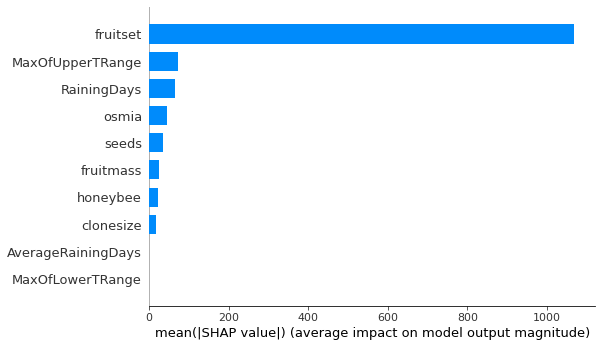

In [69]:
shap.summary_plot(shap_values_xgb, X_test_xgb_df, plot_type="bar")


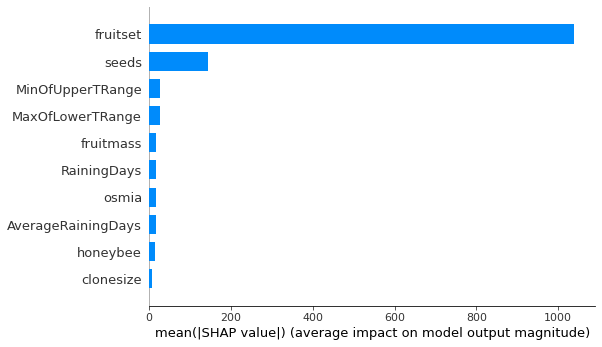

In [70]:
shap.summary_plot(shap_values_rf, X_test_rf_df, plot_type="bar")


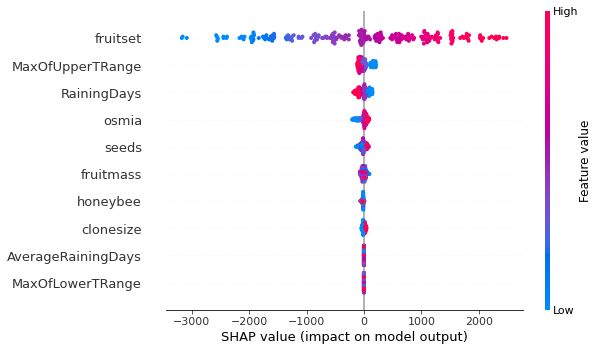

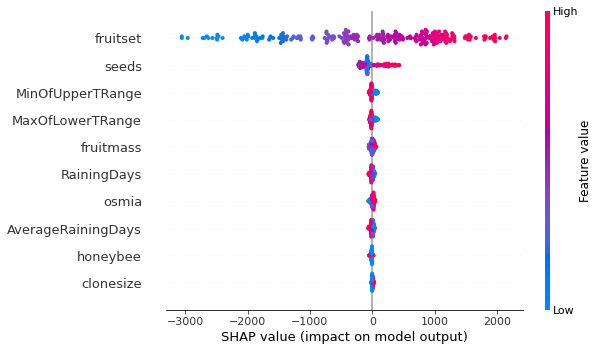

In [71]:
shap.summary_plot(shap_values_xgb, X_test_xgb_df)
shap.summary_plot(shap_values_rf, X_test_rf_df)

In [72]:
shap.initjs()

shap.force_plot(shap.TreeExplainer(xgb_final).expected_value, shap_values_xgb[50,0:-3], X_test_xgb_df.iloc[50,0:-3])

In [73]:
shap.force_plot(shap.TreeExplainer(rf_final).expected_value, shap_values_rf[120,0:-3], X_test_rf_df.iloc[120,0:-3])


In [74]:
shap.force_plot(shap.TreeExplainer(xgb_final).expected_value, shap_values_xgb[0:257,:], X_test_xgb_df.iloc[0:257,:])


# Saving Models and Plots

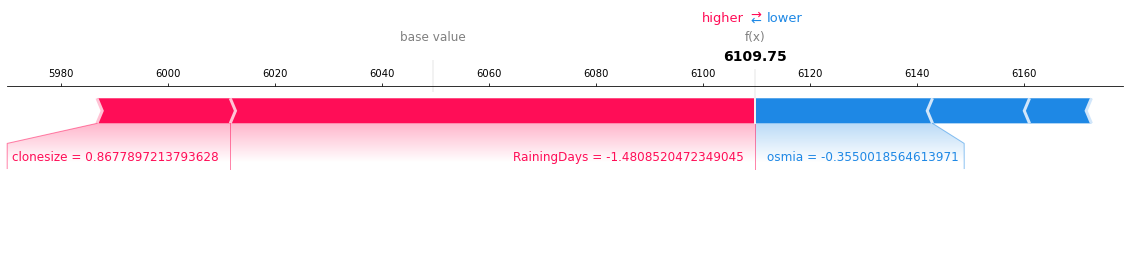

In [75]:
## uncomment to save the forceplot
shap.force_plot(shap.TreeExplainer(xgb_final).expected_value, 
                shap_values_xgb[101,0:-3], 
                X_test_xgb_df.iloc[101,0:-3], 
                show=False, 
                matplotlib=True).savefig("force_plot_101.png")

In [76]:
# # Save best grid search pipeline to file
dump_xgb_file_name = 'xgboost_blueberry_final_model.joblib'
joblib.dump(xgb_final, dump_xgb_file_name, compress=1)
print('\nSaved %s tuned model to directory by name: %s' % ("XGB final model", dump_xgb_file_name))
    
# Save the random forest model for backup
dump_rf_file_name = 'randomforest_blueberry_final_model.joblib'
joblib.dump(rf_final, dump_rf_file_name, compress=1)
print('\nSaved %s tuned model to directory by name: %s' % ("Random Forest model", dump_rf_file_name))


Saved XGB final model tuned model to directory by name: xgboost_blueberry_final_model.joblib

Saved Random Forest model tuned model to directory by name: randomforest_blueberry_final_model.joblib


In [77]:
# # Save feature selection objects for backup
joblib.dump(fs_rf, "Randomforest_fs_object.joblib", compress=1)
print("\n Saved %s to %s" % ("Randomforest fs object", "Randomforest_fs_object.joblib"))

joblib.dump(fs_xgb, "XGB_fs_object.joblib", compress=1)
print("\n Saved %s to %s" % ("XGB fs object", "XGB_fs_object.joblib"))

# # Save final test dataset for backup
X_test_xgb_df.to_csv("X_test_xgb_df.csv")
print("\nSaved X_test for XGB to CSV")
X_test_rf_df.to_csv("X_test_rf_df.csv")
print("\nSaved X_test for RF to CSV")

# # Save final training dataset for backup
joblib.dump(X_train_xgb, "X_train_xgb.joblib")
print("\n Saved X_train for XGB to joblib file")

joblib.dump(X_train_rf, "X_train_rf.joblib")
print("\n Saved X_train for RF to joblib file")


 Saved Randomforest fs object to Randomforest_fs_object.joblib

 Saved XGB fs object to XGB_fs_object.joblib

Saved X_test for XGB to CSV

Saved X_test for RF to CSV

 Saved X_train for XGB to joblib file

 Saved X_train for RF to joblib file


In [78]:
joblib.dump(y_testdrop_no, "y_testdrop_no.joblib", compress=1)
print("\nSaved y_testdrop_no to joblib file")


Saved y_testdrop_no to joblib file


In [80]:
xgb_final.predict(X_test_xgb_df.iloc[120,:].values.reshape(1,-1))

xgb_final.predict(
        np.array([37.5, 0.75, 0.25, 0.25, 86.0, 62.0, 16.0, 0.26, 0.410652, 0.408159]).reshape(1,-1)
)

array([6214.532], dtype=float32)

In [81]:
# # Forceplot with external query, with 
shap.force_plot(shap.TreeExplainer(xgb_final).expected_value, #pass the model
                shap.TreeExplainer(xgb_final).shap_values(X_test_xgb_df.iloc[120,:].values.reshape(1,-1)), #pass query, will give the prediction
                X_test_xgb_df.iloc[120,:]) # pass the query in form of dataframe

<Figure size 648x936 with 0 Axes>

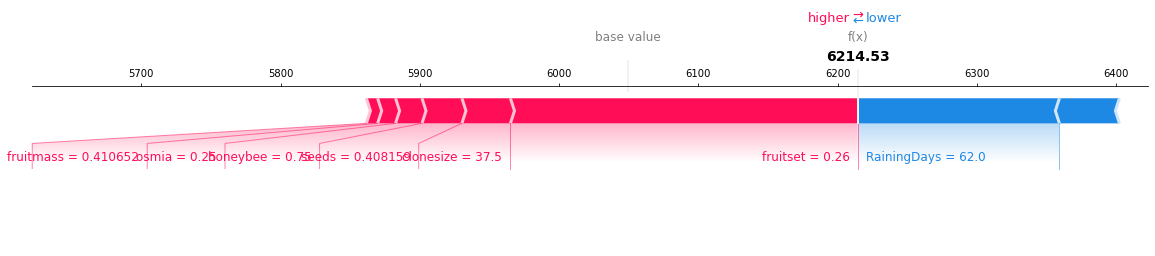

In [83]:
plt.figure(figsize=(9,13))
shap.force_plot(shap.TreeExplainer(xgb_final).expected_value, #pass the model
                shap.TreeExplainer(xgb_final).shap_values(np.array([37.5, 0.75, 0.25, 0.25, 86.0, 62.0, 16.0, 0.26, 0.410652, 0.408159]).reshape(1,-1)), #pass query, will give the prediction
                np.array([37.5, 0.75, 0.25, 0.25, 86.0, 62.0, 16.0, 0.26, 0.410652, 0.408159]).reshape(1,-1),
                feature_names=feature_columns,
               show=False,
               matplotlib=True).savefig("test_for_plot.png", bbox_inches = 'tight') # pass the query in form of dataframe